In [53]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [54]:
#보스턴 데이터 가져오기

boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [70]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [56]:
#학습 데이터와 타겟 데이터 분리
# y_target = boston.target
y_target = df['PRICE']
x_feat = np.array(df.drop('PRICE', axis=1))

In [57]:
#학습 데이터와 시험 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x_feat, y_target, test_size = 0.2 )

In [58]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [59]:
print("학습 데이터 정확도 : ",model.score(x_train, y_train))
print("시험 데이터 정확도 : ", model.score(x_test, y_test))

학습 데이터 정확도 :  0.7386953888121628
시험 데이터 정확도 :  0.7416109300331599


In [60]:
a = model.coef_
print(len(a))
a

13


array([-1.04413408e-01,  4.27279392e-02, -1.66449656e-02,  3.01658777e+00,
       -1.62632212e+01,  3.75556164e+00, -1.48024603e-03, -1.43254482e+00,
        3.02070398e-01, -1.23715129e-02, -8.92895912e-01,  8.83362721e-03,
       -5.10788344e-01])

In [61]:
b = model.intercept_
b

35.34019295609928

In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, boston.data, boston.target, cv=10, scoring='neg_mean_squared_error')
print("NMSE scores : {}".format(scores))
print("NMSE scores mean : {}".format(scores.mean()))
print("NMSE scores std : {}".format(scores.std()))


NMSE scores : [  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
NMSE scores mean : -34.70525594452493
NMSE scores std : 45.573999200308926


In [63]:
r2_scores = cross_val_score(model, boston.data, boston.target, cv=10, scoring='r2')

print("R2 scores: {}".format(r2_scores))
print("R2 scores mean: {}".format(r2_scores.mean()))
print("R2 scores std: {}".format(r2_scores.std()))

R2 scores: [ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
R2 scores mean: 0.20252899006056008
R2 scores std: 0.5952960169512287


In [64]:
print('y= ' + str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_) :
    print(str(c) + '*X' + str(i))

y= 35.34019295609928 
-0.10441340830912274*X0
0.04272793918912589*X1
-0.016644965612406866*X2
3.0165877699783614*X3
-16.263221187676095*X4
3.755561642676909*X5
-0.0014802460348676749*X6
-1.4325448189456413*X7
0.30207039768596977*X8
-0.012371512888263228*X9
-0.8928959115274522*X10
0.008833627207349402*X11
-0.5107883437001934*X12


In [65]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_predict = model.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print('RMSE : {}'.format(rmse))
print('R2 Score : {}'.format(r2))

RMSE : 4.657526376793998
R2 Score : 0.7386953888121628


In [66]:
y_test_predict = model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print('RMSE : {}'.format(rmse))
print('R2 Score : {}'.format(r2))

RMSE : 4.791386342508935
R2 Score : 0.7416109300331599


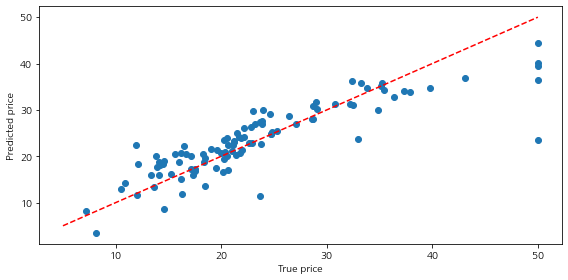

In [67]:
def plot_boston_prices(expected, predicted) :
    plt.figure(figsize=(8,4))
    plt.scatter(expected, predicted)
    plt.plot([5,50], [5,50], '--r')
    plt.xlabel('True price')
    plt.ylabel('Predicted price')
    plt.tight_layout()
    
predicted = model.predict(x_test)
expected = y_test

plot_boston_prices(expected, predicted)

test[1]의 추정 price = 16.89
test[1]의 실제 price = 10.20
추정 오류 = rmse(추정 price - 실제 price) = 6.69
시험 데이터 전체 오류 (rmse) = 23.9680
시험 데이터 전체 오류 (R2-score) = 0.8179


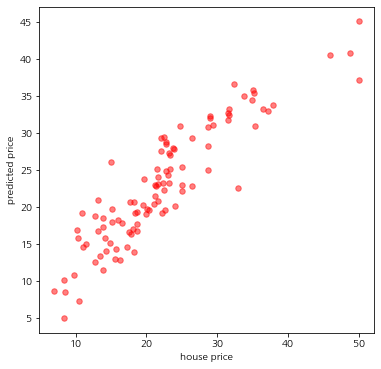

In [71]:
# Linear Regression으로 Boston Housing 데이터를 학습한다.
# ------------------------------------------------------
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Boston housing data set을 읽어온다
boston = load_boston()

# 데이터를 표준화한다. train과 test 데이터를 동시에 표준화 했다.
# 괜찮을까? 문제라면 무엇이 문제일까?
f_scale = StandardScaler()
t_scale = StandardScaler()

f_scaled = f_scale.fit_transform(boston.data)
t_scaled = t_scale.fit_transform(boston.target.reshape(-1,1))

# Train 데이터 세트와 Test 데이터 세트를 구성한다
x_train, x_test, y_train, y_test = train_test_split(f_scaled, t_scaled, test_size = 0.2)

# Logistic Regression으로 Train 데이터 세트를 학습한다.
model = LinearRegression()
model.fit(x_train, y_train)

# x_test[n]에 해당하는 target (price)을 추정한다.
n = 1
y_pred = model.predict(x_test[n].reshape(1, -1))

y_pred

# 복원
y_pred = t_scale.inverse_transform(y_pred)
y_true = t_scale.inverse_transform(y_test[n].reshape(-1, 1))

print('test[%d]의 추정 price = %.2f' % (n, y_pred))
print('test[%d]의 실제 price = %.2f' % (n, y_true))
print('추정 오류 = rmse(추정 price - 실제 price) = %.2f' % np.sqrt(np.square(y_pred - y_true)))

# 시험 데이터 전체의 오류를 MSE로 표시한다.
# MSE는 값의 범위가 크다는 단점이 있다.
y_pred = model.predict(x_test)
y_pred = t_scale.inverse_transform(y_pred)
y_true = t_scale.inverse_transform(y_test)

rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print('시험 데이터 전체 오류 (rmse) = %.4f' % rmse)

# 시험 데이터 전체의 오류를 R-square로 표시한다.
# 범위가 한정되어 MSE보다 좋은 척도다.
print('시험 데이터 전체 오류 (R2-score) = %.4f' % model.score(x_test, y_test))

y_pred

# 추정 결과를 시각화 한다.
plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_pred, c='red', s=30, alpha=0.5)
plt.xlabel("house price")
plt.ylabel("predicted price")
plt.show()


In [72]:
# Linear Regression으로 Boston Housing 데이터를 학습한다.
# ------------------------------------------------------
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Boston housing data set을 읽어온다
boston = load_boston()

# 데이터를 표준화한다. train과 test 데이터를 동시에 표준화 했다.
# 괜찮을까? 문제라면 무엇이 문제일까?
f_scale = StandardScaler()
t_scale = StandardScaler()

f_scaled = f_scale.fit_transform(boston.data)
t_scaled = t_scale.fit_transform(boston.target.reshape(-1,1))

# Train 데이터 세트와 Test 데이터 세트를 구성한다
x_train, x_test, y_train, y_test = train_test_split(f_scaled, t_scaled, test_size = 0.2)

# Logistic Regression으로 Train 데이터 세트를 학습한다.
model_LinearRegression = LinearRegression()
model_Lasso = Lasso(alpha = 1.0)
model_Ridge = Ridge(alpha = 1.0)
model_ElasticNet = ElasticNet(alpha =1.0, l1_ratio=0.5)

model_LinearRegression.fit(x_train, y_train)
model_Lasso.fit(x_train, y_train)
model_Ridge.fit(x_train, y_train)
model_ElasticNet.fit(x_train, y_train)

# x_test[n]에 해당하는 target (price)을 추정한다.
n = 1
y_pred_LinearRegression = model_LinearRegression.predict(x_test[n].reshape(1, -1))
y_pred_Lasso = model_Lasso.predict(x_test[n].reshape(1, -1))
y_pred_Ridge = model_Ridge.predict(x_test[n].reshape(1, -1))
y_pred_ElasticNet = model_ElasticNet.predict(x_test[n].reshape(1, -1))

print("y_pred_LinearRegression : ", y_pred_LinearRegression)
print("y_pred_Lasso : ", y_pred_Lasso)
print("y_pred_Ridge : ", y_pred_Ridge)
print("y_pred_ElasticNet : ", y_pred_ElasticNet)

# 복원
y_pred_LinearRegression = t_scale.inverse_transform(y_pred_LinearRegression)
y_pred_Lasso = t_scale.inverse_transform(y_pred_Lasso)
y_pred_Ridge = t_scale.inverse_transform(y_pred_Ridge)
y_pred_ElasticNet = t_scale.inverse_transform(y_pred_ElasticNet)

y_true = t_scale.inverse_transform(y_test[n].reshape(-1, 1))

print('y_pred_LinearRegression test[%d]의 추정 price = %.2f' % (n, y_pred_LinearRegression))
print('test[%d]의 실제 price = %.2f' % (n, y_true))
print('추정 오류 = rmse(추정 price - 실제 price) = %.2f' % np.sqrt(np.square(y_pred_LinearRegression - y_true)))

print('y_pred_Lasso test[%d]의 추정 price = %.2f' % (n, y_pred_Lasso))
print('test[%d]의 실제 price = %.2f' % (n, y_true))
print('추정 오류 = rmse(추정 price - 실제 price) = %.2f' % np.sqrt(np.square(y_pred_Lasso - y_true)))

print('y_pred_Ridge test[%d]의 추정 price = %.2f' % (n, y_pred_Ridge))
print('test[%d]의 실제 price = %.2f' % (n, y_true))
print('추정 오류 = rmse(추정 price - 실제 price) = %.2f' % np.sqrt(np.square(y_pred_Ridge - y_true)))

print('y_pred_ElasticNet test[%d]의 추정 price = %.2f' % (n, y_pred_ElasticNet))
print('test[%d]의 실제 price = %.2f' % (n, y_true))
print('추정 오류 = rmse(추정 price - 실제 price) = %.2f' % np.sqrt(np.square(y_pred_ElasticNet - y_true)))



# # 시험 데이터 전체의 오류를 MSE로 표시한다.
# # MSE는 값의 범위가 크다는 단점이 있다.
# y_pred = model.predict(x_test)
# y_pred = t_scale.inverse_transform(y_pred)
# y_true = t_scale.inverse_transform(y_test)

# rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
# print('시험 데이터 전체 오류 (rmse) = %.4f' % rmse)

# # 시험 데이터 전체의 오류를 R-square로 표시한다.
# # 범위가 한정되어 MSE보다 좋은 척도다.
# print('시험 데이터 전체 오류 (R2-score) = %.4f' % model.score(x_test, y_test))

# y_pred

# # 추정 결과를 시각화 한다.
# plt.figure(figsize=(6, 6))
# plt.scatter(y_true, y_pred, c='red', s=30, alpha=0.5)
# plt.xlabel("house price")
# plt.ylabel("predicted price")
# plt.show()


y_pred_LinearRegression :  [[1.29904784]]
y_pred_Lasso :  [-0.02773571]
y_pred_Ridge :  [[1.29492847]]
y_pred_ElasticNet :  [0.2210092]
y_pred_LinearRegression test[1]의 추정 price = 34.47
test[1]의 실제 price = 39.80
추정 오류 = rmse(추정 price - 실제 price) = 5.33
y_pred_Lasso test[1]의 추정 price = 22.28
test[1]의 실제 price = 39.80
추정 오류 = rmse(추정 price - 실제 price) = 17.52
y_pred_Ridge test[1]의 추정 price = 34.43
test[1]의 실제 price = 39.80
추정 오류 = rmse(추정 price - 실제 price) = 5.37
y_pred_ElasticNet test[1]의 추정 price = 24.56
test[1]의 실제 price = 39.80
추정 오류 = rmse(추정 price - 실제 price) = 15.24


In [74]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

pipe = Pipeline(steps=[('model', LinearRegression())])  # 임의 model로 pip를 초기화한다.


In [102]:
grid_params = [{'model':[LinearRegression()]},

               {'model':[Lasso()],
                'model__alpha':np.arange(0.1, 10, 0.1)},
               
               {'model':[Ridge()],
                'model__alpha':np.arange(0.1, 10, 0.1)}, 
               
               {'model':[ElasticNet()],
                'model__alpha':np.arange(0.1, 10, 0.1),
                'model__l1_ratio' :[0.1, 0.5, 1.0]}, 
              ]
grid = GridSearchCV(estimator=pipe, param_grid=grid_params, cv=10, refit=True)
grid.fit(x_train, y_train)

best_model = grid.best_estimator_

print("Best parameter = ", grid.best_params_)
print("Best test score = ", best_model.score(x_test, y_test))

Best parameter =  {'model': Ridge(alpha=6.8), 'model__alpha': 6.8}
Best test score =  0.8367131975609338


In [107]:
model_Ridge = Ridge(alpha = 6.8)
model_Ridge.fit(x_train, y_train)

n=1
y_pred_Ridge = model_Ridge.predict(x_test[n].reshape(1, -1))

print("y_pred_Ridge : ", y_pred_Ridge)

y_pred_Ridge = t_scale.inverse_transform(y_pred_Ridge)

print("y_pred_Ridge : ", y_pred_Ridge)

y_true = t_scale.inverse_transform(y_test[n].reshape(-1, 1))

print('y_pred_Ridge test[%d]의 추정 price = %.2f' % (n, y_pred_Ridge))
print('test[%d]의 실제 price = %.2f' % (n, y_true))
print('추정 오류 = rmse(추정 price - 실제 price) = %.2f' % np.sqrt(np.square(y_pred_Ridge - y_true)))


y_pred_Ridge :  [[1.27339969]]
y_pred_Ridge :  [[34.23281742]]
y_pred_Ridge test[1]의 추정 price = 34.23
test[1]의 실제 price = 39.80
추정 오류 = rmse(추정 price - 실제 price) = 5.57


시험 데이터 전체 오류 (rmse) = 25.0003
시험 데이터 전체 오류 (R2-score) = 0.8352


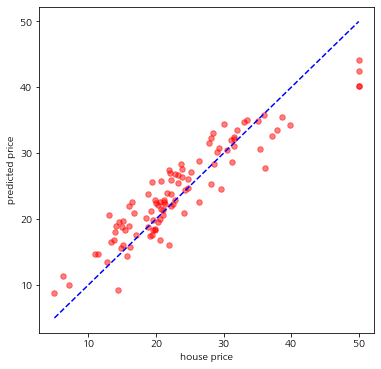

In [110]:
# 시험 데이터 전체의 오류를 MSE로 표시한다.
# MSE는 값의 범위가 크다는 단점이 있다.
y_pred_Ridge = model_Ridge.predict(x_test)
y_pred_Ridge = t_scale.inverse_transform(y_pred_Ridge)
y_true = t_scale.inverse_transform(y_test)

rmse = (np.sqrt(mean_squared_error(y_test, y_pred_Ridge)))
print('시험 데이터 전체 오류 (rmse) = %.4f' % rmse)

# 시험 데이터 전체의 오류를 R-square로 표시한다.
# 범위가 한정되어 MSE보다 좋은 척도다.
print('시험 데이터 전체 오류 (R2-score) = %.4f' % model.score(x_test, y_test))

y_pred

# 추정 결과를 시각화 한다.
plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_pred_Ridge, c='red', s=30, alpha=0.5)
plt.xlabel("house price")
plt.ylabel("predicted price")
plt.plot([5,50], [5,50], '--b')
plt.show()